In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:90% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0, '../')

import numpy as np
import tensorflow as tf
import os, sys, time, pickle, functools
import utils, optimization, metrics, plot, data, evaluation

import plot
from plot import get_animation, save_animation

from model import WGanModel, LapGanModel
from gan import CosmoGAN
import blocks
from blocks import *

/home/ankit/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
Mpch = 350

ln_fwd = data.fmap.log_norm_forward
ln_bkd = data.fmap.log_norm_backward

l_fwd = data.fmap.forward
l_bkd = data.fmap.backward

# Load Real Data

In [4]:
dataset = data.load.load_dataset_file(spix=256, resolution=256,Mpch=Mpch, forward_map=l_fwd, patch=False, is_3d=True)
real_nbody = dataset.get_all_data()
real_nbody_raw = l_bkd(real_nbody)
print("Nbody dataset shape: ", np.shape(real_nbody))

Loaded all 2 histograms only once in the beginning!
Nbody dataset shape:  (2, 256, 256, 256)


# more_data/upscaling_GAN_3d_gen_8_disc_6_32_new_trans

In [5]:
uni_scale = utils.load_hdf5('Samples/more_data/upscaling_GAN_3d_gen_8_disc_6_32_new_trans/2_256_samples_ckpt_91200.h5')
uni_scale_raw = l_bkd(uni_scale)

multi_scale = utils.load_hdf5('Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.h5')
multi_scale_raw = ln_bkd(multi_scale)

In [6]:
print(np.max(uni_scale_raw[0, :, :, :]))
print(np.max(multi_scale_raw[0, :, :, :]))

135239.0
67204.0


[MoviePy] >>>> Building video Samples/final/real_uni_multi.mp4
[MoviePy] Writing video Samples/final/real_uni_multi.mp4


100%|█████████▉| 256/257 [01:20<00:00,  3.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Samples/final/real_uni_multi.mp4 



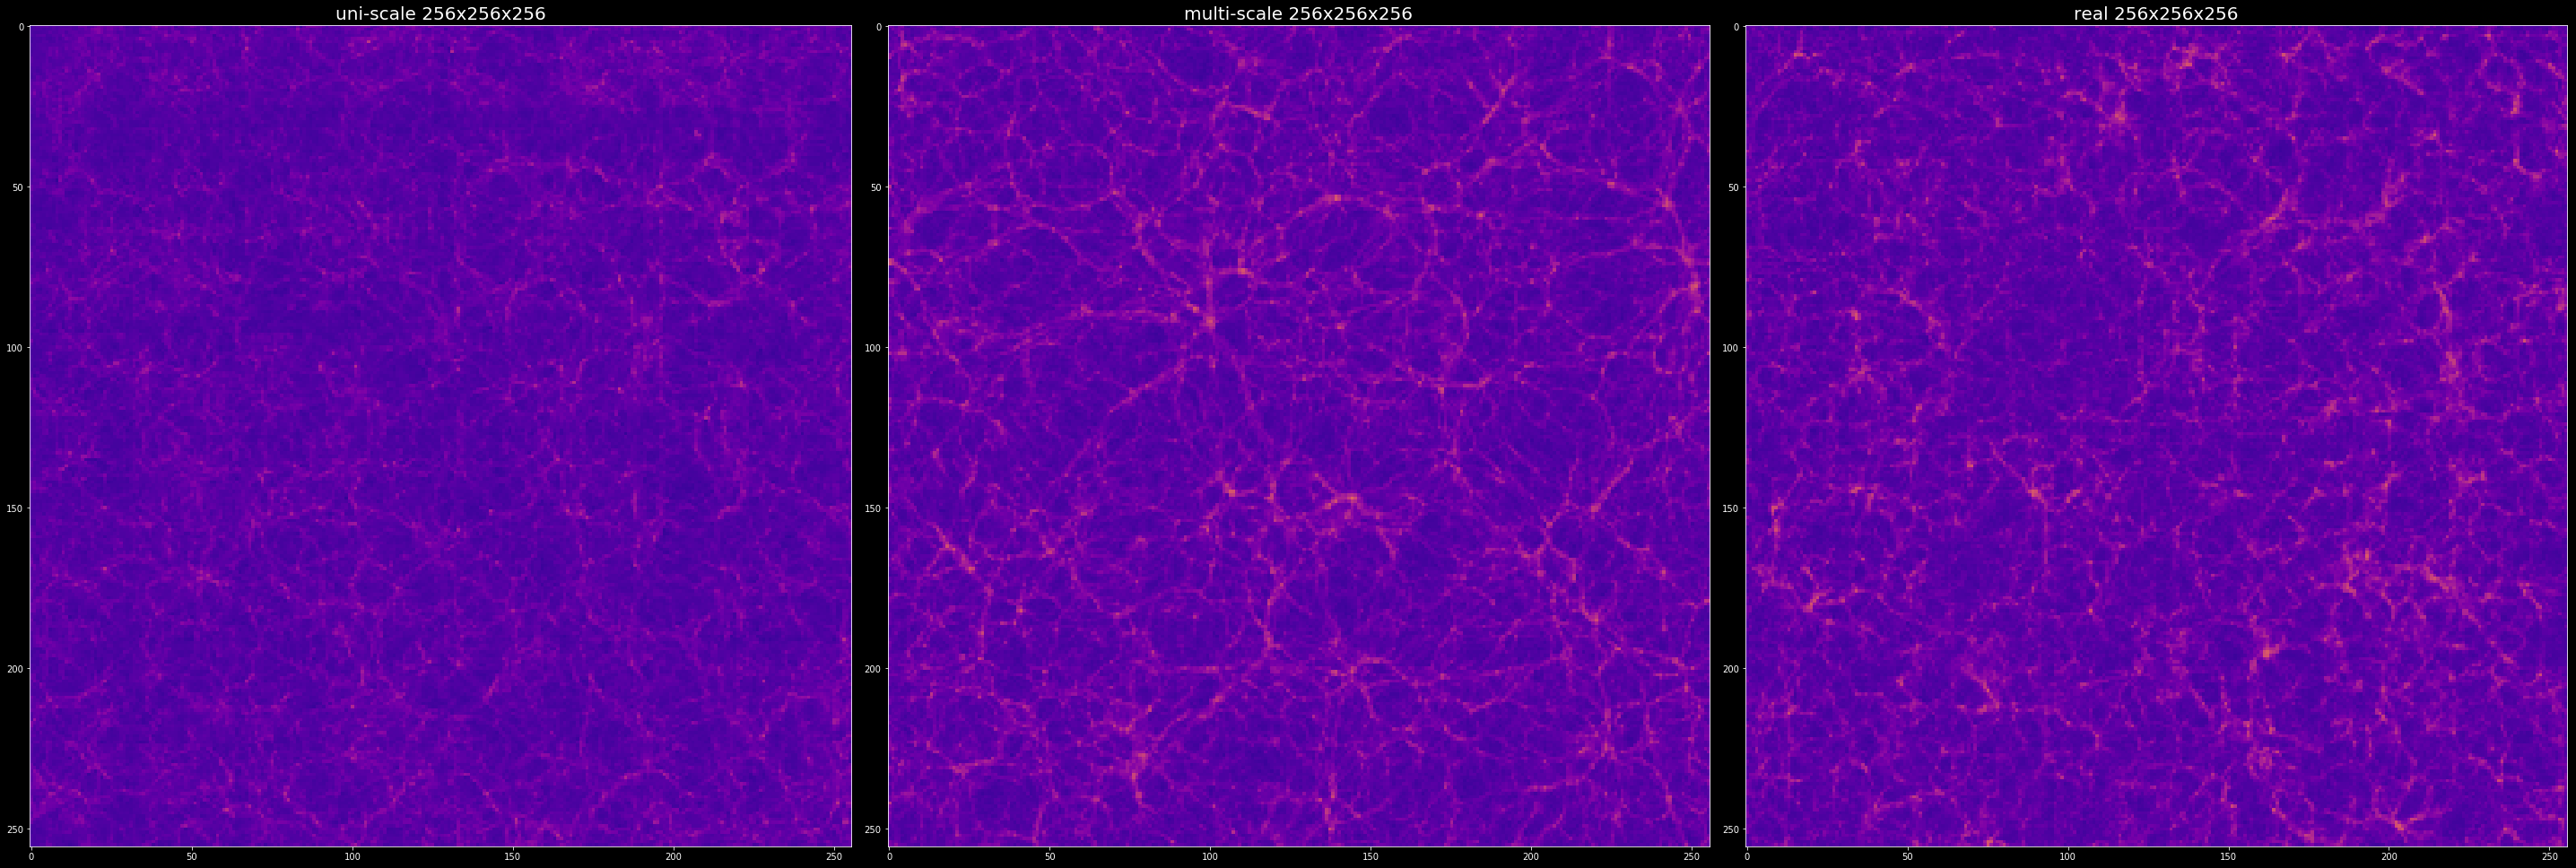

In [10]:
u = uni_scale[0, :, :, :]
m = l_fwd(multi_scale_raw[0, :, :, :])
r = real_nbody[0, :, :, :]
save_animation(u, r, m, figsize=(40, 20), fps=16, format='mp4', output_file_name='Samples/final/real_uni_multi.mp4', names=['uni-scale ', 'multi-scale ', 'real '])

Log l2 PSD loss: 9.132238187117371
L2 PSD loss: 1523179.997533347
Log l1 PSD loss: 2.5558560463761464
L1 PSD loss: 413.32813833171525


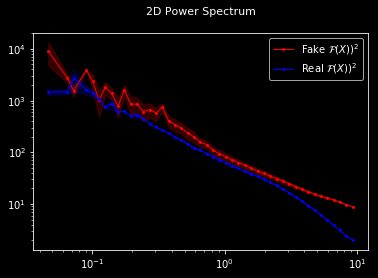

In [11]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_psd(real_nbody_raw, uni_scale_raw, is_3d=True)

Log l2 Peak Count loss: 15.4199265048222
L2 Peak Count loss: 9135156.3125
Log l1 Peak Count loss: 3.2802053263753335
L1 Peak Count loss: 2219.375


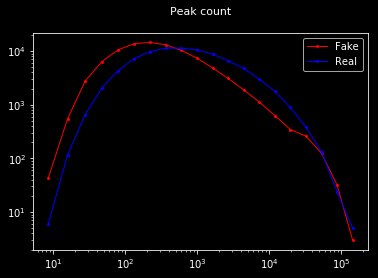

In [12]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_nbody_raw, uni_scale_raw)

Log l2 Mass histogram loss: 10.518086030984657
L2 Peak Mass histogram: 119982273040.675
Log l1 Mass histogram loss: 2.4796568269021786
L1 Mass histogram loss: 205144.25


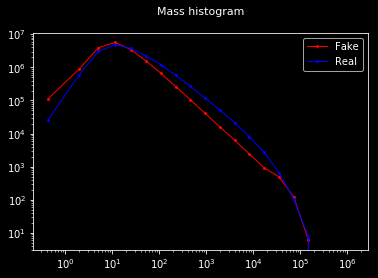

In [13]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_nbody_raw, uni_scale_raw)

# inception/upscaling_GAN_3d_gen_8_disc_6_32_new_trans

In [14]:
uni_scale = utils.load_hdf5('Samples/inception/upscaling_GAN_3d_32_gen_8_disc_6_new_trans/2_256_samples_ckpt_38000.h5')
uni_scale_raw = l_bkd(uni_scale)

multi_scale = utils.load_hdf5('Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.h5')
multi_scale_raw = ln_bkd(multi_scale)

In [15]:
print(np.max(uni_scale_raw[0, :, :, :]))
print(np.max(multi_scale_raw[0, :, :, :]))

139317.0
67204.0


[MoviePy] >>>> Building video Samples/final/real_uni_multi.mp4
[MoviePy] Writing video Samples/final/real_uni_multi.mp4


100%|█████████▉| 256/257 [01:17<00:00,  3.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Samples/final/real_uni_multi.mp4 



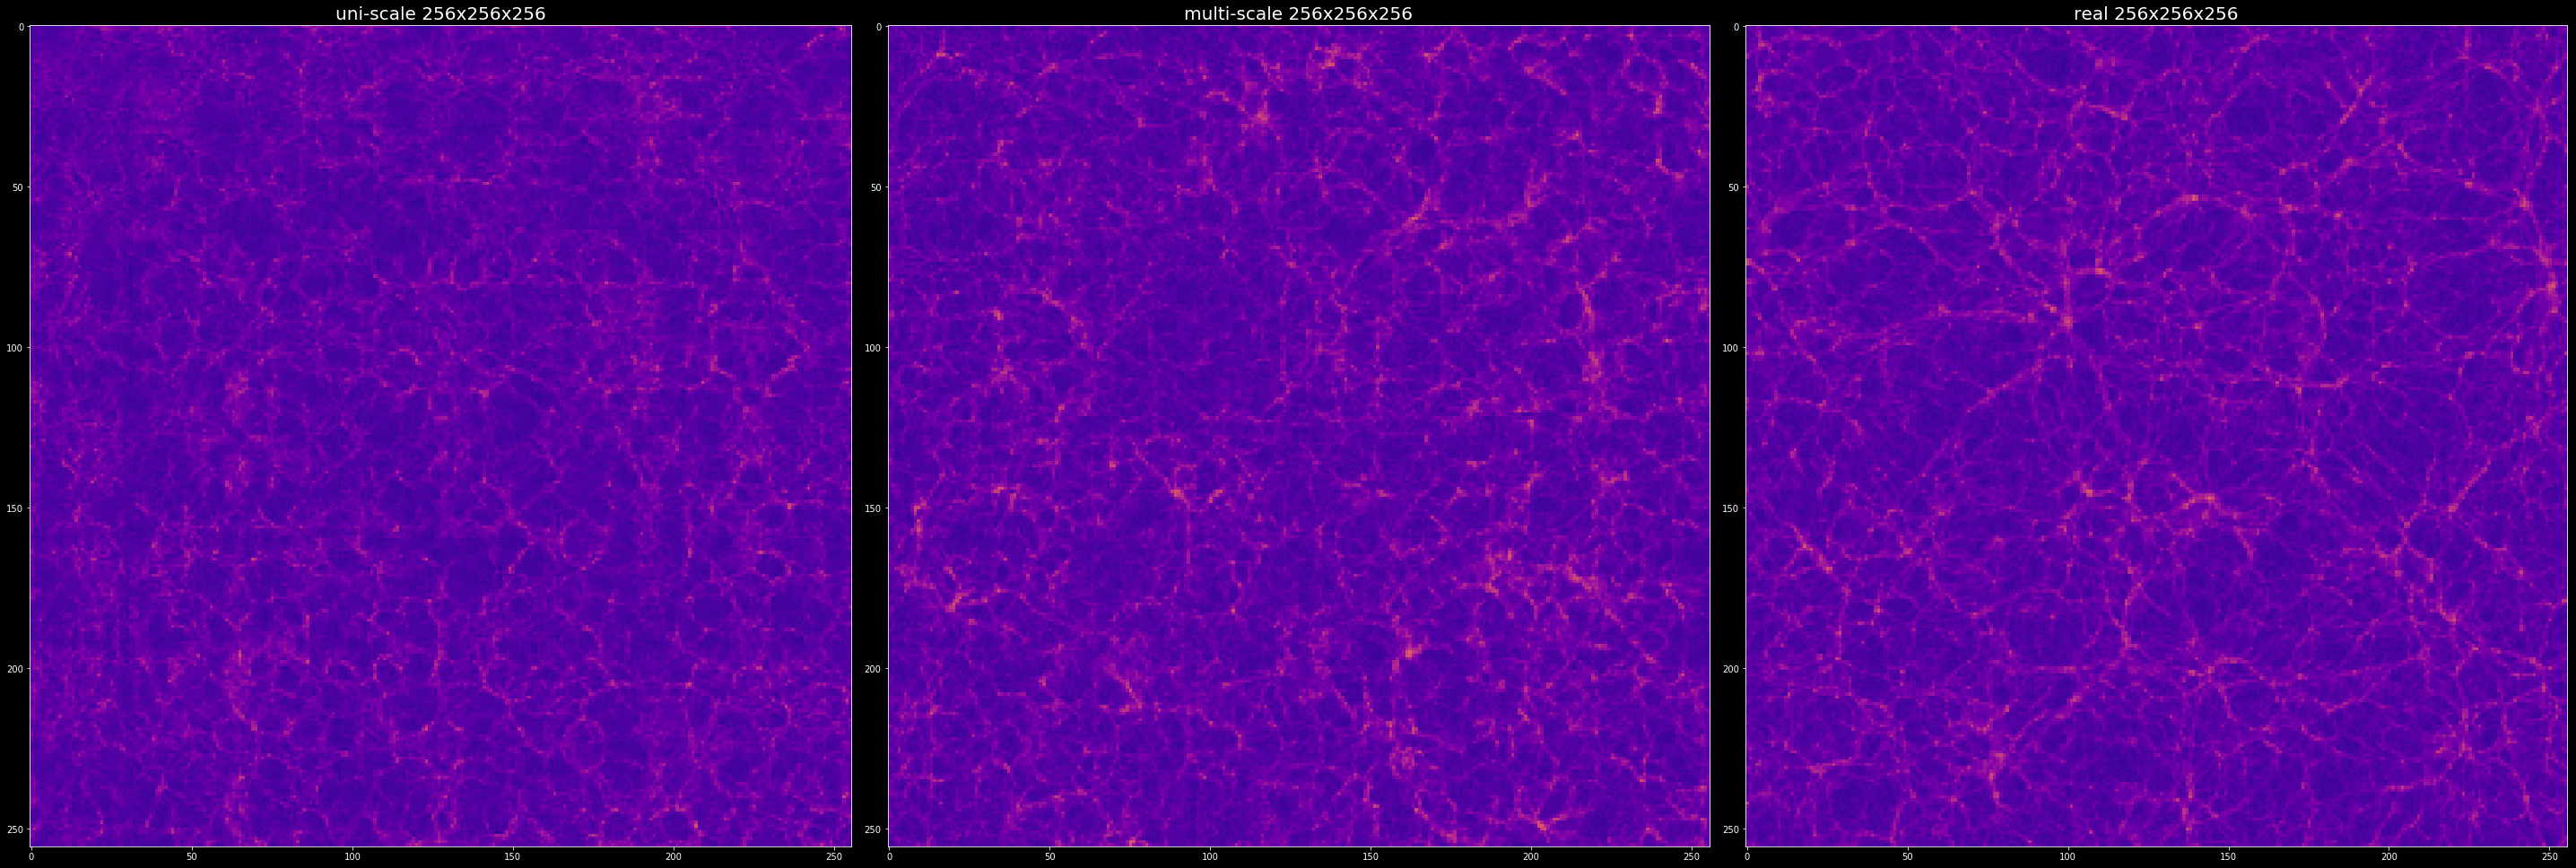

In [16]:
u = uni_scale[0, :, :, :]
m = l_fwd(multi_scale_raw[0, :, :, :])
r = real_nbody[0, :, :, :]
save_animation(u, r, m, figsize=(40, 20), fps=16, format='mp4', output_file_name='Samples/final/real_uni_multi.mp4', names=['uni-scale ', 'multi-scale ', 'real '])

Log l2 PSD loss: 3.6515754501215936
L2 PSD loss: 286812.0835354856
Log l1 PSD loss: 1.4825710930946399
L1 PSD loss: 162.61866438825763


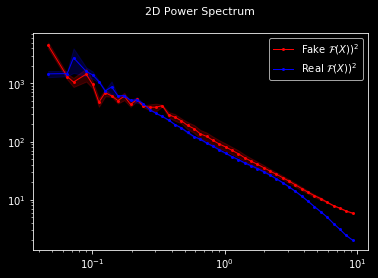

In [17]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_psd(real_nbody_raw, uni_scale_raw, is_3d=True)

Log l2 Peak Count loss: 2.966647975700452
L2 Peak Count loss: 2840008.675
Log l1 Peak Count loss: 1.4836599383226508
L1 Peak Count loss: 1212.8


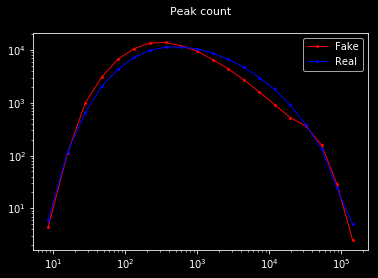

In [18]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_nbody_raw, uni_scale_raw)

Log l2 Mass histogram loss: 3.842712881480807
L2 Peak Mass histogram: 22511000761.625
Log l1 Mass histogram loss: 1.4163697654057121
L1 Mass histogram loss: 84721.5


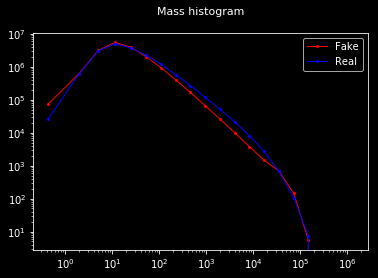

In [19]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_nbody_raw, uni_scale_raw)

# 0->32->64->256

## 0->32

In [6]:
dataset_32 = data.load.load_dataset_file(spix=32, resolution=256, Mpch=Mpch, scaling=8, augmentation=False, shuffle=False, forward_map=ln_fwd, patch=False, is_3d=True)
real_nbody_32 = dataset_32.get_all_data()
real_nbody_32_raw = ln_bkd(real_nbody_32)
print("Nbody dataset_32 shape: ", np.shape(real_nbody_32))

Loaded all 2 histograms only once in the beginning!
Tensor down_sampler_out_3d_8:0 not found, hence creating the Op.
Nbody dataset_32 shape:  (2, 32, 32, 32)


In [7]:
gen_samples_32 = utils.load_hdf5('Samples/final/32_32_32_log_norm/8_32_samples_ckpt_27k.h5')[:2]
gen_samples_32_raw = ln_bkd(gen_samples_32)

In [8]:
print(np.min(gen_samples_32), np.max(gen_samples_32))
print(np.min(real_nbody_32), np.max(real_nbody_32))
print(np.min(gen_samples_32_raw), np.max(gen_samples_32_raw))
print(np.min(real_nbody_32_raw), np.max(real_nbody_32_raw))

0.26028696 0.8177253
0.27340308 0.9134536
4.0 134.0
4.0 239.0


 97%|█████████▋| 30/31 [00:04<00:00,  6.93it/s]


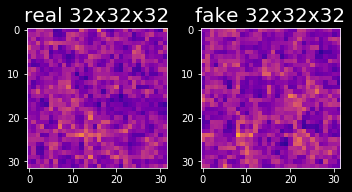

In [9]:
fake_cube_32 = l_fwd(gen_samples_32_raw[0, :, :, :])
real_cube_32 = l_fwd(real_nbody_32_raw[0, :, :, :])
animation = get_animation(real_cube_32, fake_cube_32, figsize=(5, 5), fps=5)
animation.ipython_display(fps=5, loop=True, autoplay=True)
#save_animation(real_cube, fake_cube, figsize=(20, 20), fps=5, format='mp4', output_file_name='Samples/bigstat/0_to_32_to_64_to_256/2_256_samples_ckpt_19000_38000_21000.mp4')

Log l2 PSD loss: 1.0621764779477325
L2 PSD loss: 7145.449218511218
Log l1 PSD loss: 0.6046713751484231
L1 PSD loss: 30.25673408014536


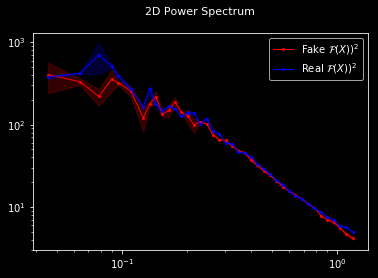

In [10]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_psd(real_nbody_32_raw, gen_samples_32_raw, is_3d=True)

Log l2 Peak Count loss: 117.70129126884406
L2 Peak Count loss: 15.425
Log l1 Peak Count loss: 7.000856719854667
L1 Peak Count loss: 2.6


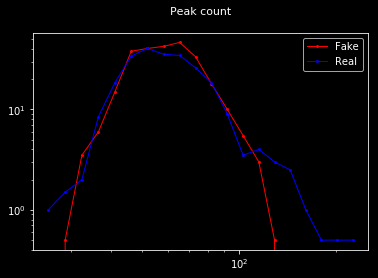

In [11]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_nbody_32_raw, gen_samples_32_raw)

Log l2 Mass histogram loss: 45.236097990853885
L2 Peak Mass histogram: 36134.325
Log l1 Mass histogram loss: 2.6153343390480392
L1 Mass histogram loss: 99.55


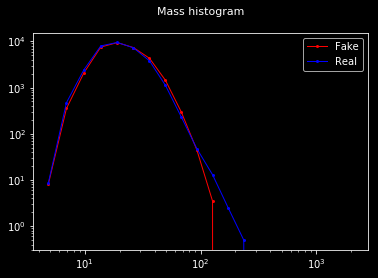

In [12]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_nbody_32_raw, gen_samples_32_raw)

## 32->64

In [13]:
dataset_64 = data.load.load_dataset_file(spix=64, resolution=256, Mpch=Mpch, scaling=4, augmentation=False, shuffle=False, forward_map=ln_fwd, patch=False, is_3d=True)
real_nbody_64 = dataset_64.get_all_data()
real_nbody_64_raw = ln_bkd(real_nbody_64)
print("Nbody dataset_64 shape: ", np.shape(real_nbody_64_raw))

Loaded all 2 histograms only once in the beginning!
Tensor down_sampler_out_3d_4:0 not found, hence creating the Op.
Nbody dataset_64 shape:  (2, 64, 64, 64)


In [14]:
#gen_samples_64 = utils.load_hdf5('Samples/bigstat/inception_32_to_64_upsampled_upscaling_GAN_3d_32_gen_8_disc_6_new_trans/2_64_samples_ckpt_120k_163k.h5')
gen_samples_64 = utils.load_hdf5('Samples/final/resnet_32_to_64_log_norm/2_64_samples_ckpt_72k_27k.h5')
gen_samples_64_raw = ln_bkd(gen_samples_64)

In [15]:
print(np.min(gen_samples_64), np.max(gen_samples_64))
print(np.min(real_nbody_64), np.max(real_nbody_64))
print(np.min(gen_samples_64_raw), np.max(gen_samples_64_raw))
print(np.min(real_nbody_64_raw), np.max(real_nbody_64_raw))

0.07903122 1.2148504
0.2091262 1.5832838
1.0 1463.0
3.0 12100.0


 98%|█████████▊| 60/61 [00:10<00:00,  5.54it/s]


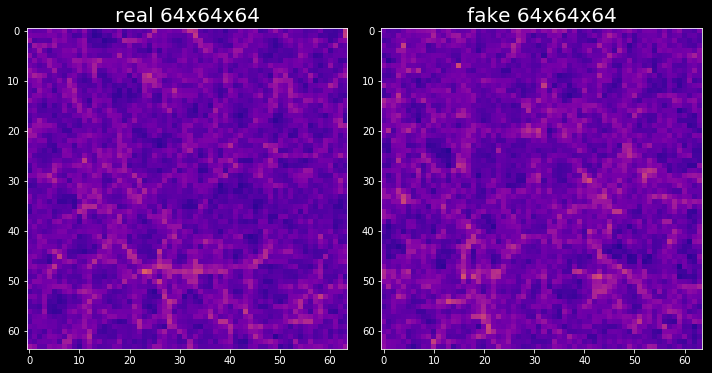

In [16]:
fake_cube_64 = l_fwd(gen_samples_64_raw[0, :, :, :])
real_cube_64 = l_fwd(real_nbody_64_raw[0, :, :, :])
animation = get_animation(real_cube_64, fake_cube_64, figsize=(10, 10), fps=5)
animation.ipython_display(fps=5, loop=True, autoplay=True)
#save_animation(real_cube, fake_cube, figsize=(20, 20), fps=5, format='mp4', output_file_name='Samples/bigstat/0_to_32_to_64_to_256/2_256_samples_ckpt_19000_38000_21000.mp4')

Log l2 PSD loss: 4.428998522150892
L2 PSD loss: 16633.862810233517
Log l1 PSD loss: 1.6863434313381567
L1 PSD loss: 49.09911205928968


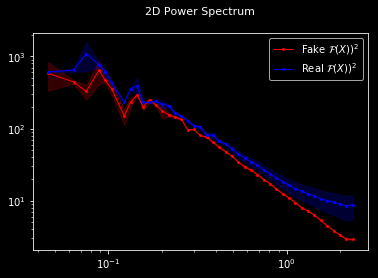

In [17]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_psd(real_nbody_64_raw, gen_samples_64_raw, is_3d=True)

Log l2 Peak Count loss: 86.39185875582038
L2 Peak Count loss: 2035.4375
Log l1 Peak Count loss: 5.698651378055442
L1 Peak Count loss: 25.475


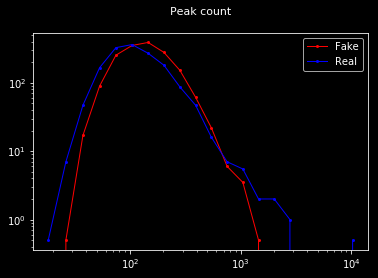

In [18]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_nbody_64_raw, gen_samples_64_raw)

Log l2 Mass histogram loss: 42.97261899321013
L2 Peak Mass histogram: 3813244.4625
Log l1 Mass histogram loss: 2.7620830789633404
L1 Mass histogram loss: 987.475


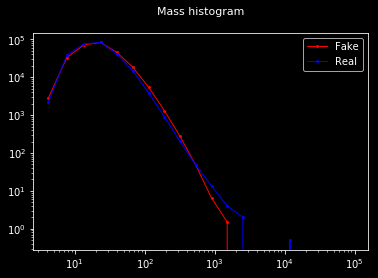

In [19]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_nbody_64_raw, gen_samples_64_raw)

## 64->256

In [21]:
dataset_256 = data.load.load_dataset_file(spix=256, resolution=256, Mpch=Mpch, scaling=1, forward_map=ln_fwd, augmentation=False, shuffle=False, patch=False, is_3d=True)
real_nbody_256 = dataset_256.get_all_data()
real_nbody_256_raw = ln_bkd(real_nbody_256)

print("Nbody dataset_256 shape: ", np.shape(real_nbody_256))

Loaded all 2 histograms only once in the beginning!
Nbody dataset_256 shape:  (2, 256, 256, 256)


In [22]:
#gen_samples_256 = utils.load_hdf5('Samples/bigstat/0_to_32_to_64_to_256_new_trans/2_256_samples_ckpt_no-inception-336k_116k_156k.h5')
gen_samples_256 = utils.load_hdf5('Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.h5')
gen_samples_256_raw = ln_bkd(gen_samples_256)

In [23]:
print(np.min(gen_samples_256), np.max(gen_samples_256))
print(np.min(real_nbody_256), np.max(real_nbody_256))
print(np.min(gen_samples_256_raw), np.max(gen_samples_256_raw))
print(np.min(real_nbody_256_raw), np.max(real_nbody_256_raw))
print(ln_fwd)

0.0 2.9222386
0.0 5.203132
0.0 76377.0
0.0 185874.0
<function log_norm_forward at 0x7fab7cf3c950>


[MoviePy] >>>> Building video Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.mp4
[MoviePy] Writing video Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.mp4


100%|█████████▉| 255/256 [01:07<00:00,  3.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.mp4 



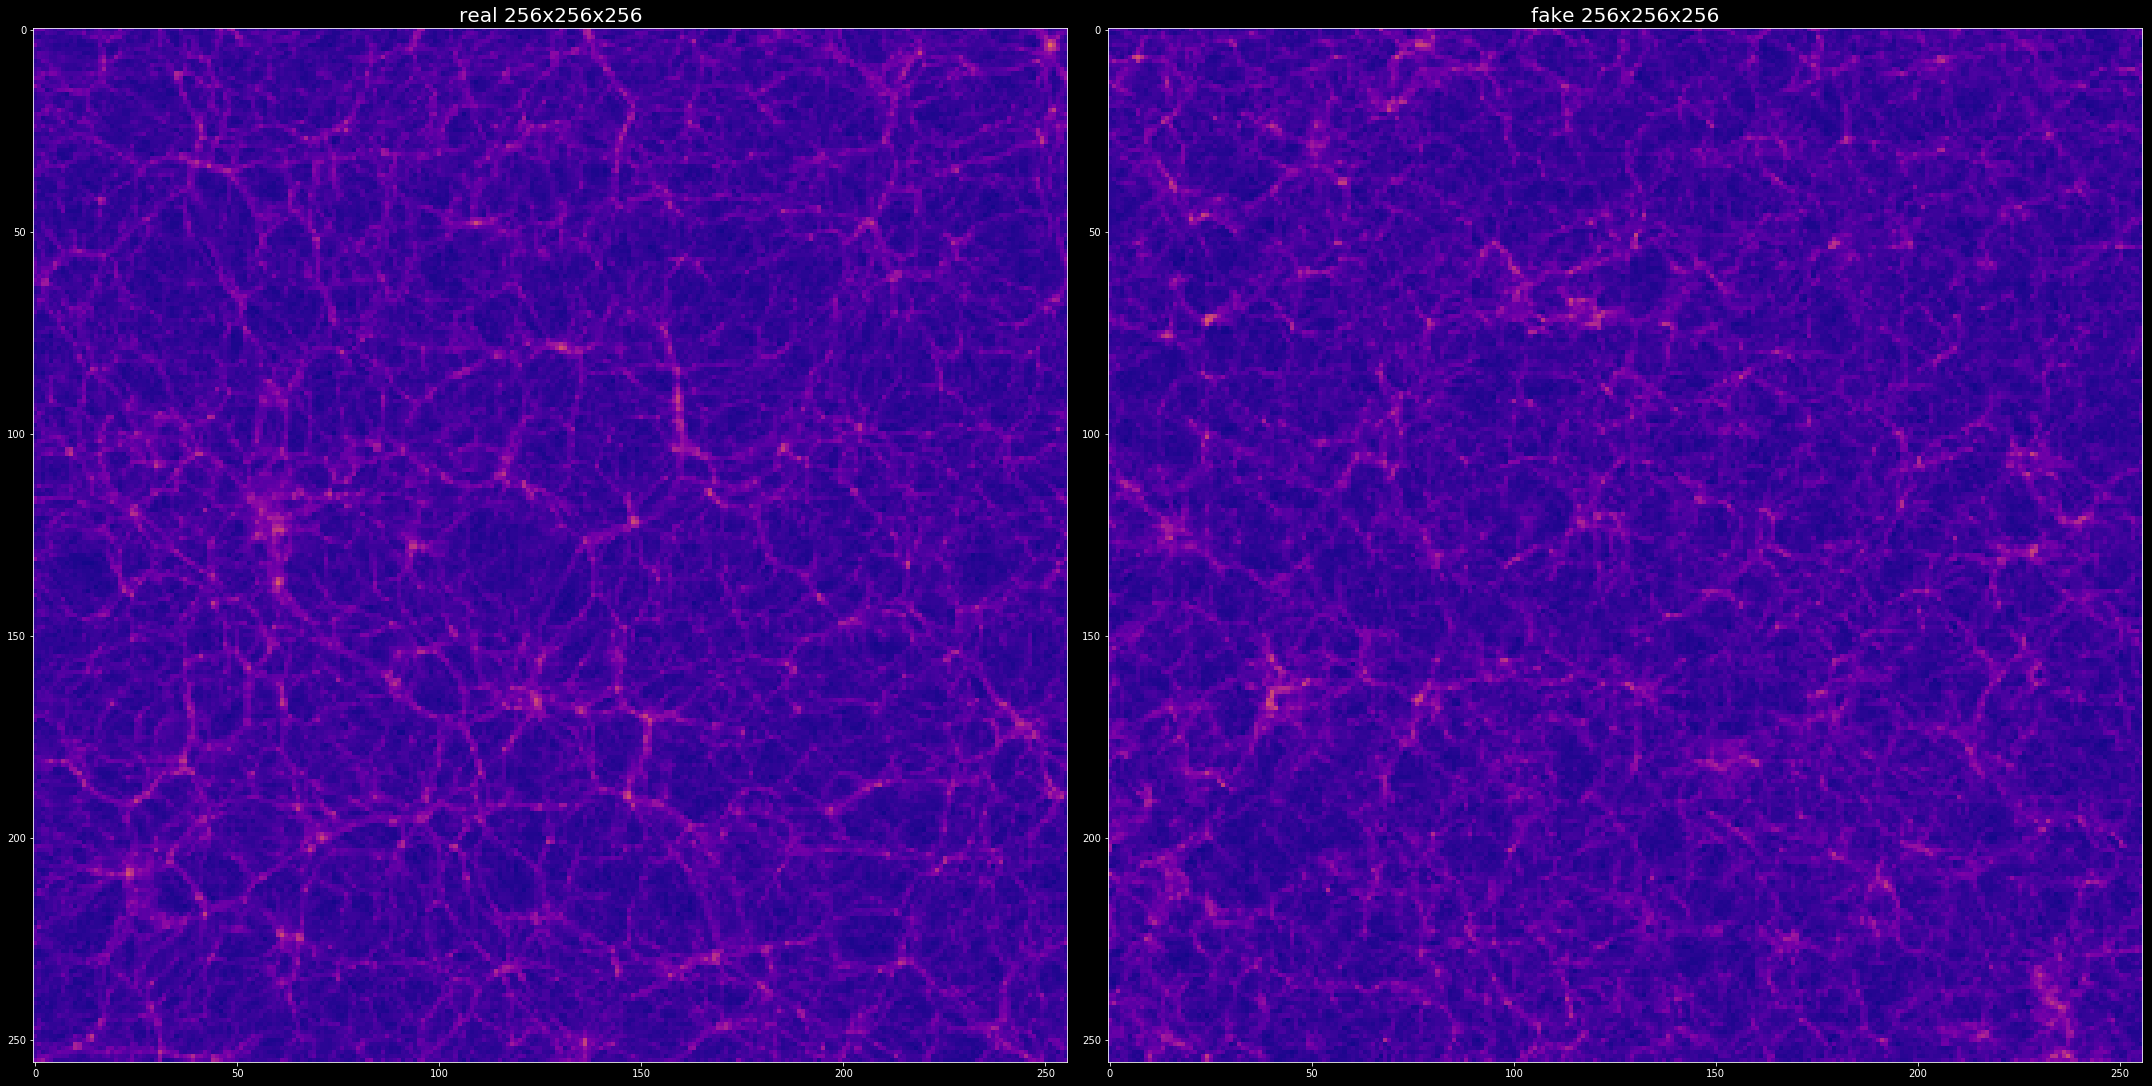

In [24]:
fake_cube_256 = l_fwd(gen_samples_256_raw[0, :, :, :])
real_cube_256 = l_fwd(real_nbody_256_raw[0, :, :, :])
#animation = get_animation(real_cube_256, fake_cube_256, figsize=(20, 20), fps=5)
#animation.ipython_display(fps=5, loop=True, autoplay=True)
save_animation(real_cube_256, fake_cube_256, figsize=(30, 20), fps=5, format='mp4', output_file_name='Samples/final/resnet_64_to_256_log_norm/2_256_samples_ckpt_99k_resnet-72k_27k.mp4')

Log l2 PSD loss: 0.7350284511884226
L2 PSD loss: 84733.98986939219
Log l1 PSD loss: 0.4705127146576828
L1 PSD loss: 84.73025901620824


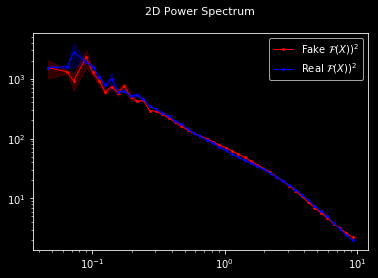

In [25]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_psd(real_nbody_256_raw, gen_samples_256_raw, is_3d=True)

Log l2 Peak Count loss: 53.235694907682294
L2 Peak Count loss: 262208.9
Log l1 Peak Count loss: 3.272249800273717
L1 Peak Count loss: 391.45


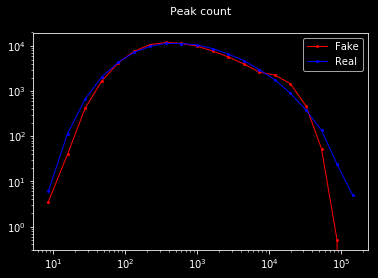

In [26]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_nbody_256_raw, gen_samples_256_raw)

Log l2 Mass histogram loss: 45.029483715299534
L2 Peak Mass histogram: 6915143664.2
Log l1 Mass histogram loss: 2.2038644395342275
L1 Mass histogram loss: 39746.25


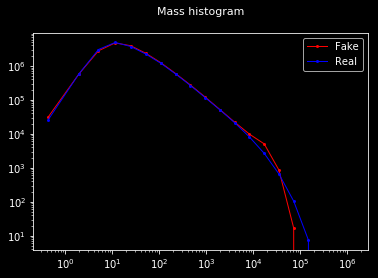

In [27]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_nbody_256_raw, gen_samples_256_raw)

In [31]:
print(plt.style.available)

['seaborn-muted', 'Solarize_Light2', 'grayscale', 'seaborn', 'seaborn-poster', 'dark_background', 'seaborn-colorblind', 'seaborn-bright', 'fivethirtyeight', 'tableau-colorblind10', 'ggplot', 'bmh', 'seaborn-pastel', 'seaborn-whitegrid', 'fast', '_classic_test', 'seaborn-paper', 'classic', 'seaborn-darkgrid', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-deep', 'seaborn-dark', 'seaborn-talk', 'seaborn-white']
